In [1]:
import sys

print("--Python.version—")
print(sys.version)

--Python.version—
3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


### 실습도구 Jupyter notebook

- Anaconda 설치방법 link: https://greeksharifa.github.io/references/2019/02/01/Miniconda-usage/
- jupyter notebook 설치방법 link: https://greeksharifa.github.io/references/2019/01/26/Jupyter-usage/

# Linear Regression

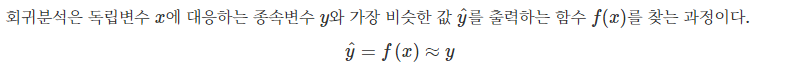

#### 부가 설명 ####
- 독립변수(independent variable): 각각 독립적인 변수이며, 다른 변수에 영향을 받지 않고 종속 변수에 영향을 줌
- 종속변수(dependent variable): 독립변수에 영향을 받아서 변화하는 변수

> 독립변수와 종속변수는 인과관계를 가지고 있음

## 실습1 - Single Linear Regression##
> 독립변수 1개로 종속변수를 예측

### 실습 Data ###
>**※ 몸무게로 키를 예측**

        data_name: 7차 인체치수조사(2015년 기준)
        data_type: Numeric
        data_link: https://sizekorea.kr/page/report/1

In [5]:
# 기본적으로 많이 쓰이는 툴 #
import pandas as pd
import numpy as np

In [6]:
# encoding: UTF-8, EUC-KR, CP949 등
body_data = pd.read_csv(r'D:\Downloads\body_data.csv', encoding='utf-8', sep=',', header=None, \
                        names= ['Gender', 'Age', 'Weight', 'Belly', 'Height'])
body_data

,Gender,Age,Weight,Belly,Height
0,남,20,68.0,74.1,175.1
1,남,20,66.0,78.0,176.9
2,남,19,69.0,75.5,174.4
3,남,20,81.0,84.5,173.6
4,남,20,81.0,88.8,175.1
...,...,...,...,...,...
6415,여,29,55.0,84.2,161.8
6416,여,29,56.0,86.0,160.6
6417,여,44,50.0,83.1,150.8
6418,여,29,55.0,83.1,160.6


In [4]:
# column의 속성이름 변경 
body_data['Gender'] = body_data['Gender'].replace('남', 'man')
body_data['Gender'] = body_data['Gender'].replace('여', 'woman')


In [5]:
body_data

,Gender,Age,Weight,Belly,Height
0,man,20,68.0,74.1,175.1
1,man,20,66.0,78.0,176.9
2,man,19,69.0,75.5,174.4
3,man,20,81.0,84.5,173.6
4,man,20,81.0,88.8,175.1
...,...,...,...,...,...
6415,woman,29,55.0,84.2,161.8
6416,woman,29,56.0,86.0,160.6
6417,woman,44,50.0,83.1,150.8
6418,woman,29,55.0,83.1,160.6


In [6]:
# 결측치 보기 
body_data.isnull().sum()

Gender    0
Age       0
Weight    7
Belly     5
Height    1
dtype: int64

In [7]:
# 결측치제거 #axis: 제거할 row or column 결정 # inplace: 즉시 적용할 지 여부 결정
body_data.dropna(axis=0, inplace=True)

In [8]:
# 결측치 여부확인
print(body_data.isnull().sum())

Gender    0
Age       0
Weight    0
Belly     0
Height    0
dtype: int64


In [9]:
print('결측치 데이터 제거 후 데이터 수: {}개'.format(len(body_data)))

결측치 데이터 제거 후 데이터 수: 6410개


In [10]:
# 중복제거
body_data.drop_duplicates(inplace=True)
print('중복 데이터 제거 후 데이터 수: {}개'.format(len(body_data)))

중복 데이터 제거 후 데이터 수: 6403개


In [11]:
# 행 랜덤 선택
body_data = body_data.sample(n=1000)
body_data

,Gender,Age,Weight,Belly,Height
1535,man,25,79.0,91.4,174.4
4496,woman,19,58.0,83.5,159.4
5016,woman,16,74.0,93.5,160.0
6258,woman,39,58.0,87.0,162.5
5893,woman,19,57.0,83.1,156.6
...,...,...,...,...,...
4533,woman,19,57.0,82.3,168.0
3619,woman,30,47.0,78.9,163.0
4712,woman,18,67.0,87.0,161.4
5300,woman,25,66.0,86.0,170.3


In [14]:
# 남자 구분 # 나이별 오름차순 정렬
data_man = body_data[body_data['Gender'] == 'man']
data_man.sort_values(by=['Age'], axis=0, ascending=True)

,Gender,Age,Weight,Belly,Height
60,man,15,66.0,76.5,171.4
1903,man,16,71.0,77.8,173.1
2853,man,16,72.0,87.0,165.5
1921,man,16,50.0,69.5,162.2
2586,man,16,63.0,78.2,173.7
...,...,...,...,...,...
1616,man,68,59.0,84.8,159.3
2596,man,68,69.0,85.6,176.0
146,man,68,50.0,79.5,153.3
150,man,69,54.0,73.2,167.7


In [15]:
# 여자 구분 # 나이별 오름차순 정렬
data_woman = body_data[body_data['Gender'] == 'woman']
data_woman.sort_values(by=['Age'], axis=0, ascending=True)

,Gender,Age,Weight,Belly,Height
3239,woman,16,57.0,78.2,164.6
3243,woman,16,62.0,81.5,166.0
6135,woman,16,52.0,81.7,158.3
5008,woman,16,48.0,76.1,158.1
4720,woman,16,57.0,81.8,163.9
...,...,...,...,...,...
5252,woman,67,65.0,94.6,157.0
5070,woman,68,54.0,89.6,157.5
3539,woman,68,53.0,91.5,153.7
5080,woman,68,66.0,98.5,153.5


### 상관관계 분석 - Scatter Plot
>- 남, 여를 분리하여 변수간의 상관관계 시각화

In [16]:
import matplotlib.pyplot as plt

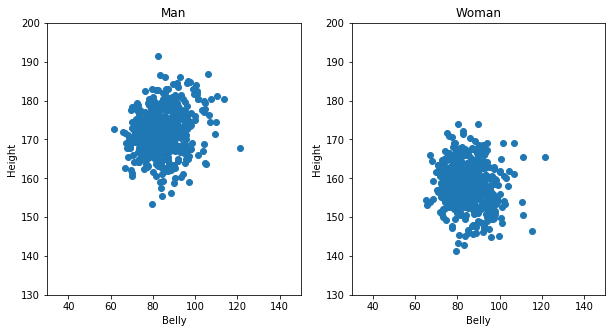

In [19]:
# figsize: 그래프 가로, 세로 인치단위 크기 설정
fig = plt.figure(figsize=(10,5))

# 1행, 2열 중 첫번째 plot
ax1 = fig.add_subplot(1, 2, 1)
# 1행, 2열 중 두번째 plot
ax2 = fig.add_subplot(1, 2, 2)

# scatter plot # 남
ax1.scatter(data_man['Belly'], data_man['Height'])

# scatter plot # 여
ax2.scatter(data_woman['Belly'], data_woman['Height'])

# scaling #
ax1.set(xlim=[30, 150], ylim=[130, 200], title='Man', xlabel='Belly', ylabel='Height')
ax2.set(xlim=[30, 150], ylim=[130, 200], title='Woman', xlabel='Belly', ylabel='Height')

plt.show()

In [20]:
# seaborn을 통한 시각화 #
import seaborn as sns

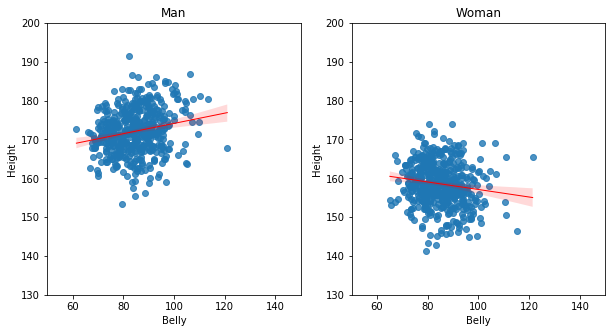

In [21]:
# subplot 생성 #
f, axes = plt.subplots(1, 2, figsize=(10,5))

sns.regplot(x='Belly', y='Height', data=data_man, ax=axes[0], label='man', line_kws={'lw': 1, 'color': 'red'})
sns.regplot(x='Belly', y='Height', data=data_woman, ax=axes[1], label='woman', line_kws={'lw': 1, 'color': 'red'})

# plot scaling
axes[0].set_xlim(50, 150)
axes[0].set_ylim(130, 200)
axes[0].set_title("Man")

axes[1].set_xlim(50, 150)
axes[1].set_ylim(130, 200)
axes[1].set_title("Woman")

plt.show()

In [22]:
# matplotlib을 통한 시각화 #
import matplotlib.pyplot as plt

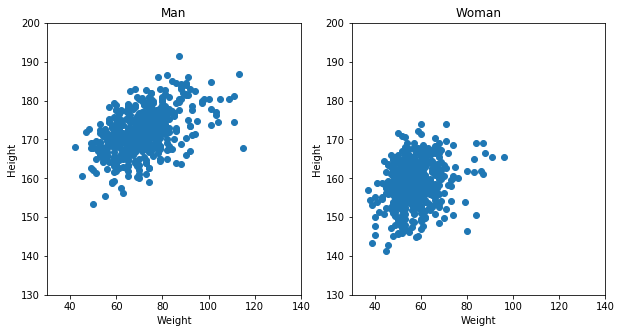

In [23]:
# figsize: 그래프 가로, 세로 인치단위 크기 설정
fig = plt.figure(figsize=(10,5))

# 1행, 2열 중 첫번째 plot
ax1 = fig.add_subplot(1, 2, 1)
# 1행, 2열 중 두번째 plot
ax2 = fig.add_subplot(1, 2, 2)

# scatter plot # 남
ax1.scatter(data_man['Weight'], data_man['Height'])

# scatter plot # 여
ax2.scatter(data_woman['Weight'], data_woman['Height'])

# scaling #
ax1.set(xlim=[30, 140], ylim=[130, 200], title='Man', xlabel='Weight', ylabel='Height')
ax2.set(xlim=[30, 140], ylim=[130, 200], title='Woman', xlabel='Weight', ylabel='Height')

plt.show()

In [24]:
# seaborn을 통한 시각화 #
import seaborn as sns

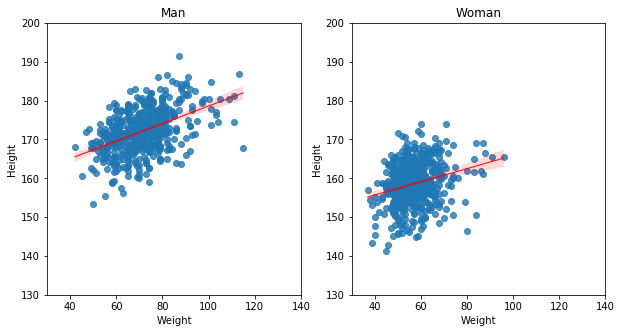

In [25]:
# subplot 생성 #
f, axes = plt.subplots(1, 2, figsize=(10,5))

sns.regplot(x='Weight', y='Height', data=data_man, ax=axes[0], label='man', line_kws={'lw': 1, 'color': 'red'})
sns.regplot(x='Weight', y='Height', data=data_woman, ax=axes[1], label='woman', line_kws={'lw': 1, 'color': 'red'})

# plot scaling
axes[0].set_xlim(30, 140)
axes[0].set_ylim(130, 200)
axes[0].set_title("Man")

axes[1].set_xlim(30, 140)
axes[1].set_ylim(130, 200)
axes[1].set_title("Woman")

plt.show()

In [26]:
# 상관관계 수치비교 # 범위 Co-1 ~ 1 
body_data[['Weight', 'Belly', 'Height']].corr()

,Weight,Belly,Height
Weight,1.000000,0.690976,0.630770
Belly,0.690976,1.000000,0.018894
Height,0.630770,0.018894,1.000000


### Regression Model 생성 및 학습

In [27]:
# regression model 
from sklearn.linear_model import LinearRegression

#### 1. 입력변수와 목적변수 정의
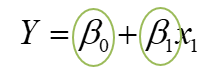

##### 모델에 fit할 때, 입력변수를 2d array로 넣는 이유
- X데이터를 넣을 때 [[x1], [x2], [x3], ... , [xn]]로 넣음. (.values.reshape(-1,1)도 가능.) 
  
  이유는 sklearn 모델에 필요한대로 X 배열을 2D 배열로 변환해야하기 때문.  
  그리고 X 변수가 하나가 아니라 여러개일 때 다중회귀분석을 실시하기 위함.

In [28]:
# sklearn 모델피팅이 안 된 예시 # 
X = body_data['Weight'] # 잘못된 예 #
y = body_data['Height']

print(X.shape, y.shape)

(1000,) (1000,)


In [29]:
#모델 객체 생성
reg = LinearRegression(fit_intercept=True) #fit_intercept -> beta0 생성 여부 # Default값

#모델 학습 안됨
reg.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 79.  58.  74.  58.  57.  64.  52.  57.  64.  69.  74.  63.  51.  58.
  59.  51.  70.  66.  74.  55.  83.  68.  71.  58.  65.  79.  48.  73.
  57. 113.  50.  51.  60.  73.  76.  57.  54.  65.  66. 115.  65.  63.
  57.  48.  71.  59.  48.  66.  58.  53.  70.  75.  46.  60.  61.  61.
  59.  57.  48.  58.  65.  57.  82.  92.  74.  50.  60.  53.  46.  72.
  60.  56.  63.  62.  62.  92.  62.  59.  52.  50.  56.  85.  44.  71.
  50.  63.  76.  74.  58.  48.  52.  68.  73.  60.  60.  61.  56.  59.
  76.  53.  49.  68.  75.  49.  63.  72.  48.  58.  47.  61.  85.  81.
  59.  69.  67.  75.  48.  48.  64.  48.  76.  80.  60.  50.  60.  45.
 105.  55.  82.  86.  50.  88.  65.  81.  57.  57.  92.  73.  69.  68.
  61.  47.  74.  71.  78.  62.  65.  76.  60.  69.  71.  51.  94.  49.
  76.  74.  68.  46.  54.  70.  77.  54.  82.  71.  54.  66.  51.  58.
  83.  52.  65. 101.  57.  89.  59.  71.  65.  80.  49.  63.  52.  79.
  56.  92.  55.  75.  66.  64.  60.  48.  56.  53.  52.  48.  86.  68.
  57.  57.  57.  58.  50.  66.  59.  76.  81.  96.  52.  68.  49.  60.
  59.  68.  59.  71.  50.  71.  56.  50.  69.  77.  63.  68.  50.  50.
  88. 103.  59.  51.  40.  79.  82.  63.  57.  71.  47.  81.  65.  62.
  91.  53.  62.  62.  52.  53.  56.  76.  58.  59.  69.  76.  57.  52.
  57.  52.  56.  52.  70.  47.  81.  48.  58.  59.  65.  59.  60.  54.
  57.  88.  39.  69.  53.  66.  83.  65.  58.  78.  48. 111.  49.  73.
  52.  65. 101.  83.  66.  51.  74.  63.  65.  71.  55.  59.  74.  66.
  45.  57.  57.  53.  53.  59.  64.  56.  97.  61.  90.  71.  57.  68.
  61.  74.  61.  73.  90.  47.  58.  61.  60.  51.  58.  57.  51.  63.
  73.  67.  62.  48.  73.  55.  52.  65.  55.  61.  60.  77.  69.  67.
  61.  45.  71.  62.  78.  51.  47.  58.  60.  52.  67.  48.  56.  72.
  65.  79.  79.  59.  68.  60.  74.  50.  80.  65.  64.  61.  69.  58.
  53.  69.  56.  77.  55.  46.  65.  60.  48.  60.  49.  49.  58.  48.
  72.  61.  57.  56.  70.  59.  84.  90.  49.  65.  56.  60.  62.  79.
  67.  80.  62.  52.  79.  58.  72.  59.  71.  67.  57.  75.  62.  74.
  63.  77.  73.  65.  69.  58.  54.  56.  78.  72.  80.  60.  55.  57.
  88.  61.  91.  60.  50.  62.  56.  81.  75.  55.  87.  75.  50. 109.
  64.  69.  71.  61.  63.  46.  61.  59.  76.  60.  48.  50.  64.  56.
  61.  52.  87.  56.  72.  68.  60.  60.  75.  47.  45.  59.  53.  68.
  70.  54.  57.  63.  63.  57.  54.  56.  49.  74.  60.  74.  65. 104.
  81.  62.  72.  57.  88.  51.  81.  55.  57.  60.  53.  60.  79.  59.
  67.  40.  52.  68.  68.  56.  68.  65.  56.  50.  55.  64.  62.  49.
  60.  55.  59.  77.  46.  66.  86.  81.  84.  78.  41.  64.  75.  58.
  60.  52.  70.  49.  58.  66.  54.  51.  50.  60.  68.  66.  59.  83.
  78.  82.  90.  67.  78.  56.  79.  53.  62.  77.  74.  80.  68.  82.
  97.  60.  49.  66.  69.  62.  53.  66.  61.  75.  61.  65.  56.  42.
  63.  59.  65.  70.  61.  68.  74.  61.  57.  38.  57.  93.  68.  63.
  62.  95.  45.  63.  75.  58.  51. 101.  55.  56.  79.  40.  61.  48.
  59.  55.  61.  69.  54.  39.  67.  54.  66.  53.  60.  64.  71.  60.
  71.  57.  61.  45.  56.  40.  67.  77.  59.  75.  59.  53.  53.  53.
  50.  69.  57.  44.  81.  54.  74.  90.  62.  68.  73.  61.  80.  74.
  94.  68.  68.  61.  53.  62.  66.  69.  75.  74.  53.  74.  56.  77.
  50.  70.  83.  76.  70.  41.  72.  43.  54.  50.  76.  64.  51.  49.
  74.  50.  59.  77.  59.  49.  46.  51.  69.  65.  48.  84.  83.  59.
  49.  79.  59.  56.  61.  68.  37.  72.  62.  80.  83.  79.  48.  64.
  46.  52.  54.  84.  60.  87.  48.  56.  74.  73.  61.  58.  54.  91.
  72.  66.  86.  65.  57.  66.  43.  57.  54.  68.  70.  82.  74.  56.
  57.  52.  64.  52.  76.  49.  57.  75.  45.  80.  72.  55.  50.  70.
  63.  58.  79.  59.  64.  58.  55.  62.  64.  74.  75.  70.  55.  76.
  71.  50.  72.  88.  62. 100.  57.  51.  60.  46.  53.  72.  58.  51.
  51.  55.  70.  59.  47.  66.  69.  93.  61.  60.  47.  59.  67.  65.
  68.  86.  52.  59.  51.  51.  61.  62.  66.  54.  74.  73.  49.  86.
  56.  57.  84.  80.  55.  78.  63.  64.  58.  64.  67.  87.  68.  69.
  72.  70.  54.  51.  67.  65.  62.  81.  72.  73.  59.  79.  85.  66.
  50.  52.  68.  69.  57.  65.  63.  75.  56.  56.  56.  70.  51.  65.
  67.  60.  66.  54.  93.  64.  55.  61.  65.  53.  62.  65.  61.  75.
  98.  61.  74.  80.  54.  52.  79.  90.  56.  50.  48.  49.  83.  69.
  85.  55.  53.  49.  63.  87.  81.  60.  65.  71.  64.  66.  68.  49.
  67.  54.  65.  73.  54.  53.  54.  64.  66.  44.  54.  54.  45.  54.
  91.  61.  53.  79.  86.  59.  73.  80.  77.  87.  79.  72.  70.  77.
  73.  53.  62.  57.  51.  57.  52.  56.  55.  48.  53.  42.  75.  56.
  65.  66.  61.  77.  64.  67.  52.  50. 103.  57.  55.  49.  60.  56.
  74.  73.  53.  65.  51.  52.  59.  56.  77.  72.  64.  69.  75.  60.
  70.  81.  55.  53.  57.  81.  65.  62.  49.  49.  80.  68.  73.  70.
  78.  61.  66.  51.  74.  55.  53.  73.  56.  75.  63.  43.  58.  70.
  53.  60.  50.  57.  79.  65.  73.  55.  84. 111.  80.  66.  61.  55.
  55.  54.  61.  59.  59.  60.  66.  64.  88.  69.  47.  47.  69.  70.
  82.  57.  47.  67.  66.  50.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [30]:
# sklearn 모델피팅이 잘 된 예시1 # 
X = body_data['Weight'].values.reshape(-1,1) # 잘된 예 #
y = body_data['Height']

print(X.shape, y.shape)

(1000, 1) (1000,)


In [31]:
# sklearn 모델피팅이 잘 된 예시2 # 
X = body_data[['Weight']] # 잘된 예 #
y = body_data['Height']

print(X.shape, y.shape)

(1000, 1) (1000,)


In [32]:
#모델 학습 잘됨
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 2. 계수 확인

In [33]:
## y = a + bx 형태 ##

# 선형 모델의 절편값 β0 # 추정된 상수항
beta0 = reg.intercept_

# 선형 모델의 기울기값 β1 # 추정된 가중치 벡터
beta1 = reg.coef_
print('y = {}+ {}x'.format(round(beta0,3), round(beta1[0],3)))

y = 136.45+ 0.45x


#### 3. 예측

In [34]:
one_pred_y = reg.predict([[58]])
one_pred_y

array([162.52656701])

In [35]:
pred_y = reg.predict(X)
print(pred_y)

[171.96809475 162.52656701 169.72011196 162.52656701 162.07697046
 165.22414637 159.82898766 162.07697046 165.22414637 167.47212916
 169.72011196 164.77454981 159.3793911  162.52656701 162.97616357
 159.3793911  167.92172572 166.12333949 169.72011196 161.17777734
 173.76648099 167.02253261 168.37132228 162.52656701 165.67374293
 171.96809475 158.03060142 169.2705154  162.07697046 187.25437776
 158.92979454 159.3793911  163.42576013 169.2705154  170.61930508
 162.07697046 160.72818078 165.67374293 166.12333949 188.15357088
 165.67374293 164.77454981 162.07697046 158.03060142 168.37132228
 162.97616357 158.03060142 166.12333949 162.52656701 160.27858422
 167.92172572 170.16970852 157.13140831 163.42576013 163.87535669
 163.87535669 162.97616357 162.07697046 158.03060142 162.52656701
 165.67374293 162.07697046 173.31688443 177.81285002 169.72011196
 158.92979454 163.42576013 160.27858422 157.13140831 168.82091884
 163.42576013 161.6273739  164.77454981 164.32495325 164.32495325
 177.81285

### 강의 때 다뤘던 내용
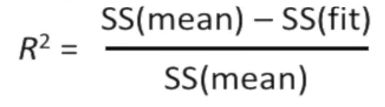

### SST, SSR, SSE 예시
- SST(Sum of Square Total):  
  > 모든 차이의 합 (SSR + SSE)
- SSR(Sum of Square Regression): 회귀식과 평균값의 차이
  > 평균y와 예측y차이가 날수록 SSR의 값이 커지는데, 이는 예측y가 모든 데이터를 고루 설명하고 있다는 것으로 해석
- SSE(Sum of Square Error): 회귀식과 실제값의 차이
  > 실제y와 예측y의 격차가 작을수록 이 모든 데이터를 고르게 설명한다고 해석할 수 있고, 높은 R-squared 값을 도출

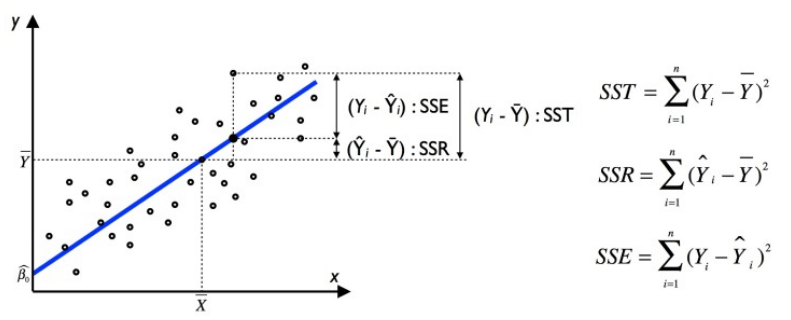

### R-squared 예시
-  흩어진 데이터들을 가장 잘 설명하는 하나의 선을 구하고, 그 선이 얼마나 데이터를 잘 설명할 수 있는가에 대한 점수
> R-square: SSR / SST or SSR / (SSR+SSE)
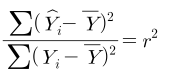

#### 4. 성능 확인 (R-square:결정계수) 

In [36]:
# 비교1) 모델을 적용해서 썻을 때, 수치비교 #
print(reg.score(X, y))

# 비교2) 기존 SSR, SST 공식을 사용했을 때 
y_bar = np.mean(y.values)

SSE = sum((y-pred_y)**2)
SSR = sum((pred_y - y_bar)**2)
SST = sum((y - y_bar)**2)

R_sqr = SSR/SST
R_sqr = SSR/(SSR+SSE)

print(R_sqr)

0.39787055224700596
0.3978705522470052


#### 5. Train, Test 분할

In [37]:
ratio = 0.8
num_data = int(len(X)* ratio)

# slicing을 이용하여 train, test set을 나눔 #
train_X, test_X = X[:num_data], X[num_data:]
train_y, test_y = y[:num_data], y[num_data:]

#### 5-1. Train 데이터 학습

In [38]:
reg2  = LinearRegression(fit_intercept = True) #객체 생성
reg2.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 5-2. Test 데이터 예측 및 성능 확인

In [39]:
y_pred2 = reg2.predict(test_X)
reg2.score(test_X, test_y)

0.31924854226339405

#### 5-3 Residual(잔차) Plot 예시

In [40]:
# 잔차: 그래프를 그린 후에 특정 패턴이 나타나면 회귀직선이 적합하지 않다는 의미
e=test_y-y_pred2
e

4504   -13.673815
5347    -6.805659
1586     2.697507
5952    -0.990389
5293   -10.222232
          ...    
4533     6.158028
3619     5.718550
4712    -5.002493
5300     4.353559
5729   -12.649606
Name: Height, Length: 200, dtype: float64

(array([ 3.,  8., 12., 28., 29., 37., 34., 25., 16.,  8.]),
 array([-18.25854551, -14.75809856, -11.2576516 ,  -7.75720465,
         -4.25675769,  -0.75631074,   2.74413621,   6.24458317,
          9.74503012,  13.24547708,  16.74592403]),
 <a list of 10 Patch objects>)

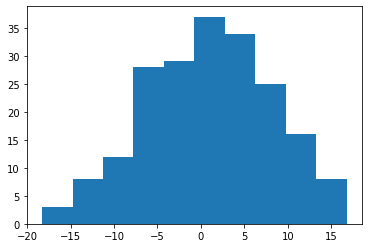

In [41]:
# histogram 예시 #
plt.hist(e, bins=10) # qq plot

### scatterplot 예시 ###
관련 link: http://mysas.co.kr/SAS_tiptech/a_question.asp?B_NO=6807&gotopage=20&cmd=content
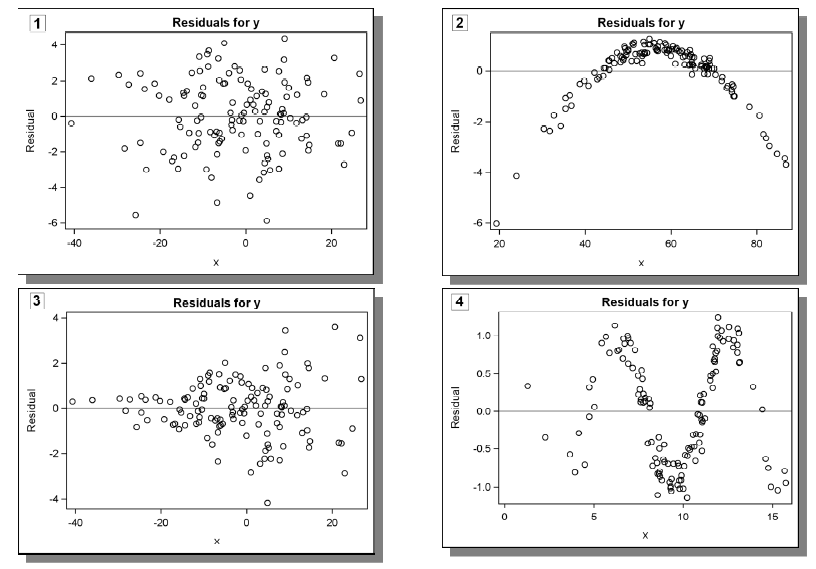

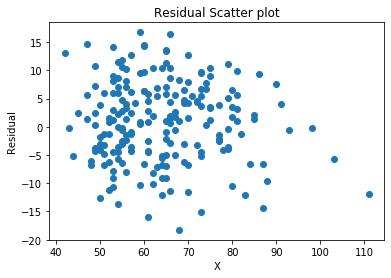

In [42]:
# scatterplot 예시 #
plt.scatter(test_X,e)
plt.title("Residual Scatter plot")
plt.xlabel("X")
plt.ylabel("Residual")
plt.show()

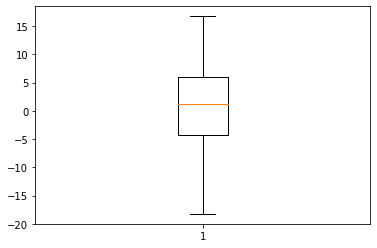

In [43]:
# box plot 예시 #
resid = test_y - y_pred2
plt.boxplot(resid)
plt.show() 